In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
X,y = make_moons(100, noise=0.25,random_state=2)

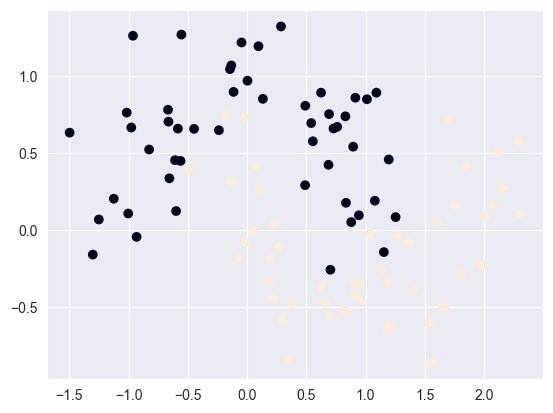

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [21]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model.add(Dense(12, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 12)             │         1,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,945 (7.60 KB)

 Trainable params: 1,945 (7.60 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5375 - loss: 1.3753 - val_accuracy: 0.8500 - val_loss: 1.1115
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 1.0617 - val_accuracy: 0.9000 - val_loss: 0.8668
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8125 - loss: 0.8789 - val_accuracy: 0.9000 - val_loss: 0.6982
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7875 - loss: 0.7539 - val_accuracy: 0.9000 - val_loss: 0.5814
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8000 - loss: 0.6658 - val_accuracy: 0.9000 - val_loss: 0.5240
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8125 - loss: 0.6124 - val_accuracy: 0.9000 - val_loss: 0.4944
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8250 - loss: 0.5824 - val_accuracy: 0.9000 - val_loss: 0.4692
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8500 - loss: 0.5576 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 755us/step


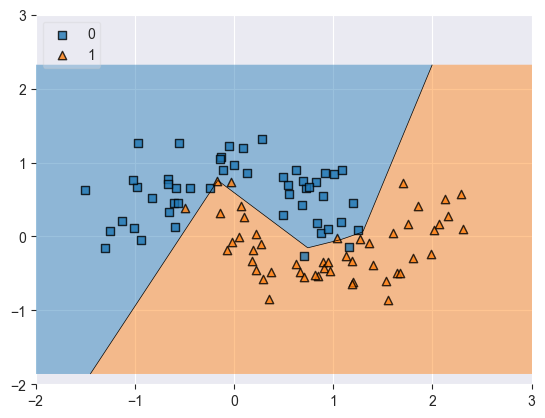

In [23]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.show()